In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import average_precision_score


###reading data
# missing_value=['?']
data = pd.read_csv("../saved F.csv")

# # print(data.isnull().sum())
print(data.shape)
# ##removing missing values
# data.dropna(inplace=True)
# #16 row removed.
# print(data.shape)
# # data
# # CDT culomn is eliminated because this culomn is empty.

(283556, 603)


In [2]:
# data1, data3 = data.copy(), data.copy()
# data1["group"] = np.array([1 if yins ==2 else 0 if yins == 1 else np.nan for yins in data1.values[:,0]])
# data3["group"] = np.array([1 if yins ==3 else 0 if yins == 1 else np.nan for yins in data3.values[:,0]])
# data1.dropna(inplace=True)
# data3.dropna(inplace=True)


# X=data1.values[:,1:]
# y=data1.values[:,0]
# X = X.astype(np.float64)
# y = y.astype(np.float64)

X = data.values[:,3:]
y = data.values[:,2]
y = np.array(list(y))
del data
###### Devide data to test and train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)
del X
del y
#preprocessing

# scaler = preprocessing.StandardScaler().fit(X)
# X_train_transformed = scaler.transform(X_train)
# X_test_transformed = scaler.transform(X_test)
# X_transformed = scaler.transform(X)


In [3]:
methodList = []
accList = []
sensitivityList = []
specificityList = []
# del data


[[34173  3470]
 [ 5499 13570]]
Logistic Regression Accuracy:  0.8418500493722669
AUPR:  0.663675315002159


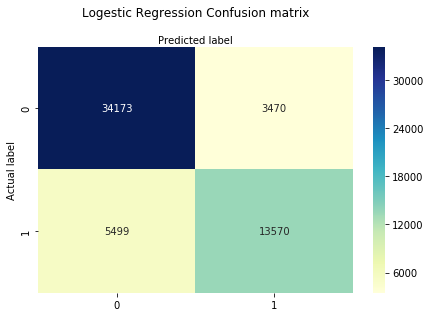

Text(0.5,1,'2-class Precision-Recall curve: AP=0.66')

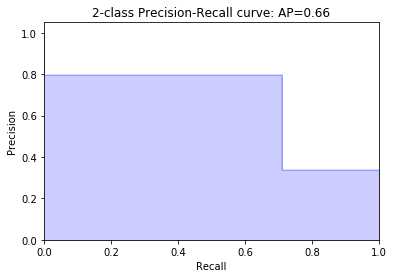

In [4]:
# loo = LeaveOneOut()
# loo.get_n_splits(X_transformed)
loologreg = LogisticRegression()
# predicts=[]

# for train_index, test_index in loo.split(X):
#     X_train, X_test = X_transformed[train_index], X_transformed[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     loologregModel =loologreg.fit(X_train, np.array(list(y_train)))
#     predicts.append(loologreg.predict(X_test))
loologregModel = loologreg.fit(X_train, np.array(list(y_train)))
predict = np.array(loologreg.predict(X_test))
cnf_matrix = metrics.confusion_matrix(np.array(list(y_test)), predict)

print(cnf_matrix)

acc = metrics.accuracy_score(y_test, predict)
average_precision = average_precision_score(y_test, predict)

print("Logistic Regression Accuracy: ", acc)
print('AUPR: ',average_precision)
# recall = metrics.recall_score(y, predict)
# print("Logistic Regression Recall by LOOCV", recall)
#
# precession = metrics.precision_score(y, predict)
# print("Logistic Regression Precession by LOOCV", precession)

######ploting
# import required modules


#matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logestic Regression Confusion matrix', y=1.1)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(y_test, predict)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUPR={0:0.2f}'.format(
          average_precision))

Logestic Regression sensitivity = [0.        0.7116262 1.       ]and Logestic Regression specificity = [0.         0.09218181 1.        ]


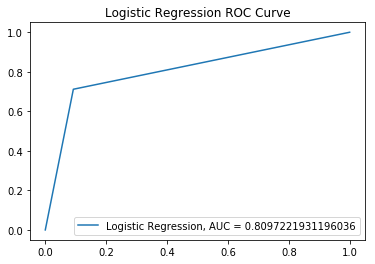

In [5]:

#### Roc Curve
fpr, tpr, _ = metrics.roc_curve(y_test,  predict)
auc = metrics.roc_auc_score(y_test, predict)
print("Logestic Regression sensitivity = "+str(tpr)+"and Logestic Regression specificity = "+str(fpr))
plt.plot(fpr,tpr,label="Logistic Regression, AUC = "+str(auc))
plt.title("Logistic Regression ROC Curve")
plt.legend(loc=4)
plt.show()

methodList.append('Logistic Regression')
accList.append(acc)
sensitivityList.append(tpr[1])
specificityList.append(1-fpr[1])

[[30141  7502]
 [ 5658 13411]]
Gaussian Naive Bayes Accuracy by LOOCV 0.7679503456058683


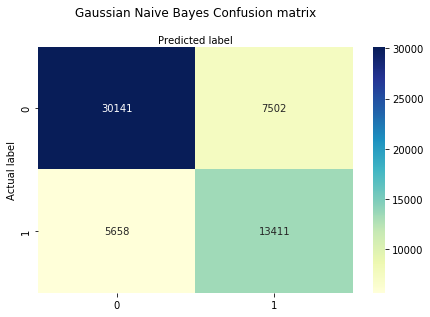

Gaussian Naive Bayes sensitivity = [0.         0.70328806 1.        ]and Gaussian Naive Bayes specificity = [0.         0.19929336 1.        ]


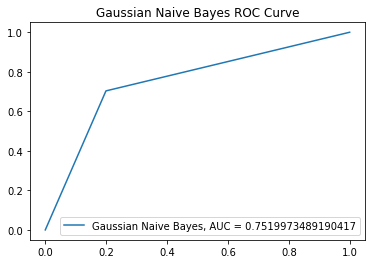

In [6]:

####GaussianNB

# loo = LeaveOneOut()
# loo.get_n_splits(X)
loologreg = GaussianNB()
# predicts=[]
# for train_index, test_index in loo.split(X):
#     X_train, X_test = X_transformed[train_index], X_transformed[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     loologregModel =loologreg.fit(X_train, y_train)
#     predicts.append(loologreg.predict(X_test))

loologregModel = loologreg.fit(X_train, np.array(list(y_train)))
predict = np.array(loologreg.predict(X_test))
cnf_matrix = metrics.confusion_matrix(y_test, predict)

print(cnf_matrix)

acc = metrics.accuracy_score(y_test, predict)
print("Gaussian Naive Bayes Accuracy by LOOCV", acc)
######ploting



#matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Gaussian Naive Bayes Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

#### Roc Curve
fpr, tpr, _ = metrics.roc_curve(y_test,  predict)
auc = metrics.roc_auc_score(y_test, predict)
print("Gaussian Naive Bayes sensitivity = "+str(tpr)+"and Gaussian Naive Bayes specificity = "+str(fpr))
plt.plot(fpr,tpr,label="Gaussian Naive Bayes, AUC = "+str(auc))
plt.title("Gaussian Naive Bayes ROC Curve")
plt.legend(loc=4)
plt.show()

methodList.append('Gaussian Naive Bayes')
accList.append(acc)
sensitivityList.append(tpr[1])
specificityList.append(1-fpr[1])

In [ ]:

###SVM
# loo = LeaveOneOut()
# loo.get_n_splits(X)
loologreg = svmachine = svm.SVC(gamma='auto',kernel='rbf',degree=3)

# predicts=[]
# for train_index, test_index in loo.split(X_transformed):
#     X_train, X_test = X_transformed[train_index], X_transformed[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     loologregModel =loologreg.fit(X_train, y_train)
#     predicts.append(loologregModel.predict(X_test))

loologregModel = loologreg.fit(X_train, np.array(list(y_train)))
predict = np.array(loologreg.predict(X_test))
cnf_matrix = metrics.confusion_matrix(y_test, predict)

print(cnf_matrix)

acc = metrics.accuracy_score(y-test, predict)
print("Support Vector Machine Accuracy by LOOCV", acc)

# recall = metrics.recall_score(y, predict)
# print("Logistic Regression Recall by LOOCV", recall)
#
# precession = metrics.precision_score(y, predict)
# print("Logistic Regression Precession by LOOCV", precession)

######ploting


#matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Support Vector Machine Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

#### Roc Curve

fpr, tpr, _ = metrics.roc_curve(y-test,  predict)
auc = metrics.roc_auc_score(y-test, predict)
print("SVM sensitivity = "+str(tpr)+"and SVM specificity = "+str(fpr))
plt.plot(fpr,tpr,label="SVM, AUC = "+str(auc))
plt.title("Support Vector Machine ROC Curve")
plt.legend(loc=4)
plt.show()

methodList.append('Support Vector Machine')
accList.append(acc)
sensitivityList.append(tpr[1])
specificityList.append(1-fpr[1])

In [ ]:
result = []
result = pd.DataFrame(result)
result['method'],result['accuracy'],result['sensitivity'],result['specificity']=methodList,accList,sensitivityList,specificityList
result.to_csv('DS1 result.csv',index=False)